# Libraries and versions

In [1]:
python_version = !python -V #version 3.7.9
import pandas as pd #version 1.2.4
import numpy as np #version 1.20.1
import seaborn as sns #version 0.11.0
import matplotlib as plt #version 3.3.3
from datetime import date as dt

In [2]:
print(f'Python version - {python_version[0][7:]}')
print(f'Pandas version - {pd.__version__}')
print(f'Numpy version - {np.__version__}')
print(f'Seaborn version - {sns.__version__}')
print(f'Matplotlib version - {plt.__version__}')

Python version - 3.7.9
Pandas version - 1.2.4
Numpy version - 1.20.1
Seaborn version - 0.11.0
Matplotlib version - 3.3.3


# Configurations

## Pandas

In [3]:
#apresentará 500 colunas e linhas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)

## Seaborn

In [4]:
sns.set_palette('inferno')
sns.set_style('darkgrid')

def configuration(graphic_object, title=None, xlabel=None, ylabel=None, colors=None):
    graphic_object.figure.set_size_inches(15,4)
    graphic_object.set_title(title, color=colors, fontsize=16)
    graphic_object.set_xlabel(xlabel, color=colors, fontsize=14)
    graphic_object.set_ylabel(ylabel, color=colors, fontsize=14)
    graphic_object = graphic_object

## Warnings

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Base

In [6]:
bvsp = pd.read_csv('BVSP.csv')
bvsp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0.0
1,1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0.0
2,1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0.0
3,1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0.0
4,1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0.0


### Informações

In [7]:
bvsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7116 entries, 0 to 7115
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7116 non-null   object 
 1   Open       6936 non-null   float64
 2   High       6936 non-null   float64
 3   Low        6936 non-null   float64
 4   Close      6936 non-null   float64
 5   Adj Close  6936 non-null   float64
 6   Volume     6936 non-null   float64
dtypes: float64(6), object(1)
memory usage: 389.3+ KB


- há 2 valores nulos
- nome das variáveis capitalizado
- coluna data não está no formato date
- comparar variáveis Fechamento e Fechamento Ajustado

## Tratar base

#### missing

In [8]:
#visualizer linhas sem valores
nan = bvsp['Open'].isna()
bvsp[nan]

,Date,Open,High,Low,Close,Adj Close,Volume
32,1993-06-10,NaN,NaN,NaN,NaN,NaN,NaN
95,1993-09-07,NaN,NaN,NaN,NaN,NaN,NaN
120,1993-10-12,NaN,NaN,NaN,NaN,NaN,NaN
135,1993-11-02,NaN,NaN,NaN,NaN,NaN,NaN
144,1993-11-15,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6279,2017-12-25,NaN,NaN,NaN,NaN,NaN,NaN
6313,2018-02-14,NaN,NaN,NaN,NaN,NaN,NaN
6572,2019-03-06,NaN,NaN,NaN,NaN,NaN,NaN
6815,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#tratar linhas sem valores com a mediana
bvsp.fillna(method='ffill', inplace=True)
bvsp.iloc[[193, 194, 195, 433, 434, 435]]

,Date,Open,High,Low,Close,Adj Close,Volume
193,1994-01-21,689.700012,713.299988,674.500000,689.200012,689.200012,0.0
194,1994-01-24,689.200012,699.500000,668.400024,689.599976,689.599976,0.0
195,1994-01-25,689.200012,699.500000,668.400024,689.599976,689.599976,0.0
433,1994-12-23,4221.200195,4354.100098,4207.899902,4351.399902,4351.399902,0.0
434,1994-12-26,4351.399902,4476.899902,4278.299805,4278.299805,4278.299805,0.0
435,1994-12-27,4278.299805,4358.700195,4035.699951,4113.700195,4113.700195,0.0


#### nome das variáveis

In [10]:
nome_var = {}
for coluna in bvsp.columns:
    dict_temp = {coluna: coluna.lower()}
    nome_var.update(dict_temp)

bvsp.rename(columns=nome_var, inplace=True)
bvsp.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj close', 'volume'], dtype='object')

#### date

In [11]:
#transformar variável em objeto de data
bvsp['date'] = pd.to_datetime(bvsp['date'], infer_datetime_format=True)
bvsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7116 entries, 0 to 7115
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       7116 non-null   datetime64[ns]
 1   open       7116 non-null   float64       
 2   high       7116 non-null   float64       
 3   low        7116 non-null   float64       
 4   close      7116 non-null   float64       
 5   adj close  7116 non-null   float64       
 6   volume     7116 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 389.3 KB


In [12]:
#criar as variáveis ano, mes e dia
bvsp['year'] = bvsp['date'].dt.year
bvsp['month'] = bvsp['date'].dt.month
bvsp['day'] = bvsp['date'].dt.day

bvsp.head()

,date,open,high,low,close,adj close,volume,year,month,day
0,1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0.0,1993,4,27
1,1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0.0,1993,4,28
2,1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0.0,1993,4,29
3,1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0.0,1993,4,30
4,1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0.0,1993,5,3


#### checar colunas close e adj close

In [13]:
#verifica se os valores nas variáveis são iguais
comparacao = bvsp['close'] == bvsp['adj close']
comparacao.value_counts()

True    7116
dtype: int64

- todos os valores são iguais, então vou excluir a variável

In [14]:
bvsp.drop(columns=['adj close'], inplace=True)
bvsp.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'year', 'month',
       'day'],
      dtype='object')

### Análise exploratória

#### período da base

In [15]:
dt_inicio = bvsp['date'].iloc[0]
dt_fim = bvsp['date'].iloc[bvsp.shape[0] - 1]

print(f'Data inicial - {dt_inicio}\nData final - {dt_fim}')

Data inicial - 1993-04-27 00:00:00
Data final - 2021-05-14 00:00:00


#### Time Series

##### Abertura e fechamento

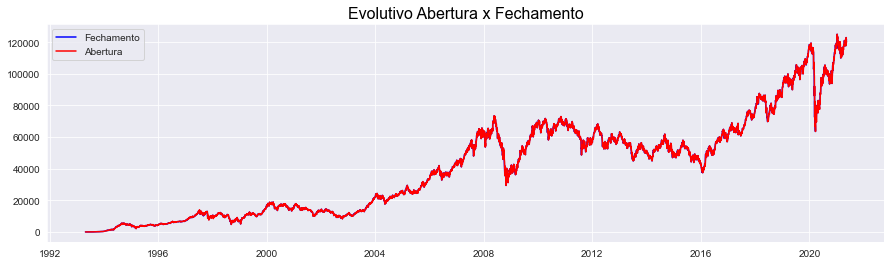

In [16]:
g1 = sns.lineplot(x=bvsp['date'], y=bvsp['close'], label='Fechamento', color='blue')
g1 = sns.lineplot(x=bvsp['date'], y=bvsp['open'], label='Abertura', color='red')
configuration(g1, title='Evolutivo Abertura x Fechamento', colors='black')

##### Alta e Baixa

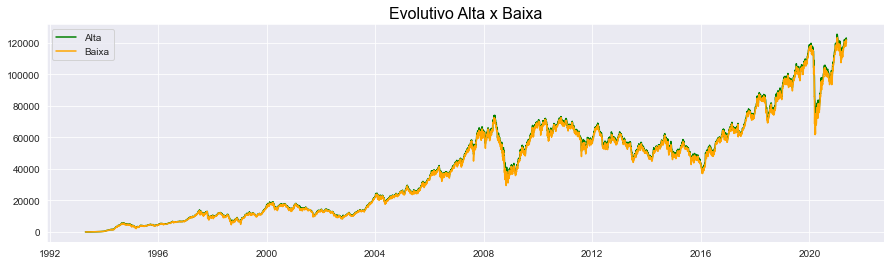

In [17]:
g2 = sns.lineplot(x=bvsp['date'], y=bvsp['high'], label='Alta', color='green')
g2 = sns.lineplot(x=bvsp['date'], y=bvsp['low'], label='Baixa', color='orange')
configuration(g2, title='Evolutivo Alta x Baixa', colors='black')

##### Volume

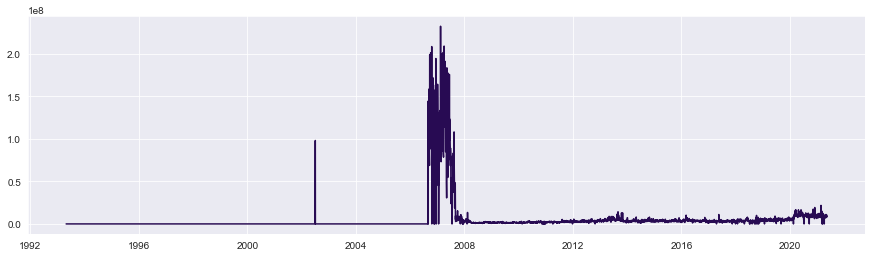

In [18]:
g3 = sns.lineplot(x=bvsp['date'], y=bvsp['volume'])
configuration(g3)

- valores de volume estão com problemas, por isso irei excluir da análise

In [19]:
#excluir coluna volume
bvsp.drop(columns=['volume'], inplace=True)
bvsp.head()

,date,open,high,low,close,year,month,day
0,1993-04-27,24.799999,25.400000,24.500000,24.500000,1993,4,27
1,1993-04-28,24.500000,24.600000,23.700001,24.299999,1993,4,28
2,1993-04-29,24.299999,24.799999,23.700001,23.700001,1993,4,29
3,1993-04-30,23.700001,24.200001,23.700001,24.100000,1993,4,30
4,1993-05-03,24.100000,24.400000,23.799999,24.100000,1993,5,3


- o índice não apresenta estacionaridade, mas também apresenta diversos pontos de sazonalidade, principalmente indicados nos anos de 2008-9 (subprime) e 2020 (covid-19)
- é importante notar que na crise de 2020 o índice retornou a valores vistos em 2007 (de 120 mil a 60 mil pontos), mas a curva de retomada é maior do que a vista na crise de 2008
- importante avaliar a sazonaridade da série

##### Sazonaridade

In [20]:
#transformar a variável em array
bvsp.set_index('date', inplace=True)

#### Distribuição

<AxesSubplot:xlabel='high', ylabel='Density'>

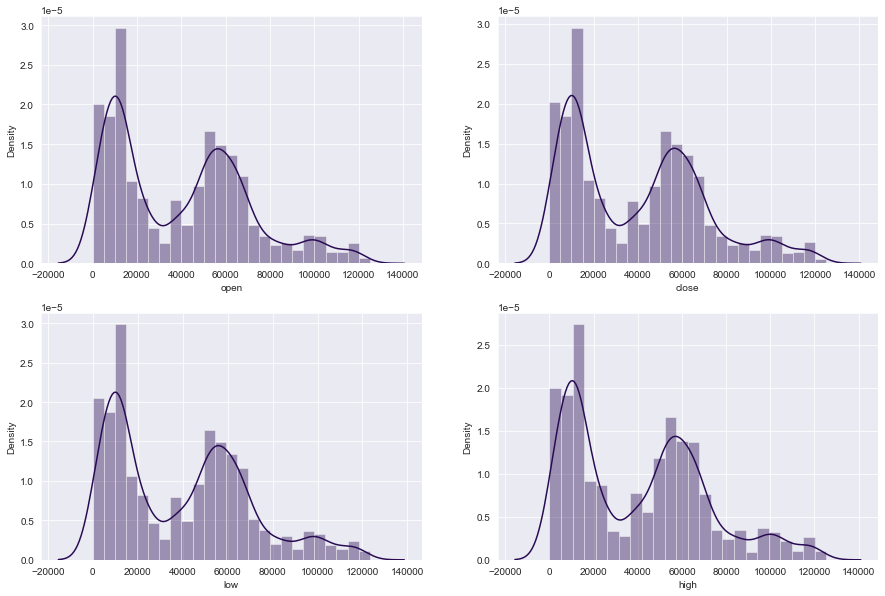

In [21]:
fig, axes = plt.pyplot.subplots(2,2, figsize=(15,10))
sns.distplot(bvsp['open'], ax=axes[0,0])
sns.distplot(bvsp['close'], ax=axes[0,1])
sns.distplot(bvsp['low'], ax=axes[1,0])
sns.distplot(bvsp['high'], ax=axes[1,1])

- as variáveis possuem comportamento similares
- não se comportam como uma normal, embora também não se possa afirmar que possuem uma assimetria a esquerda, uma vez que apresentam um vale entre dois picos

##### Correlação

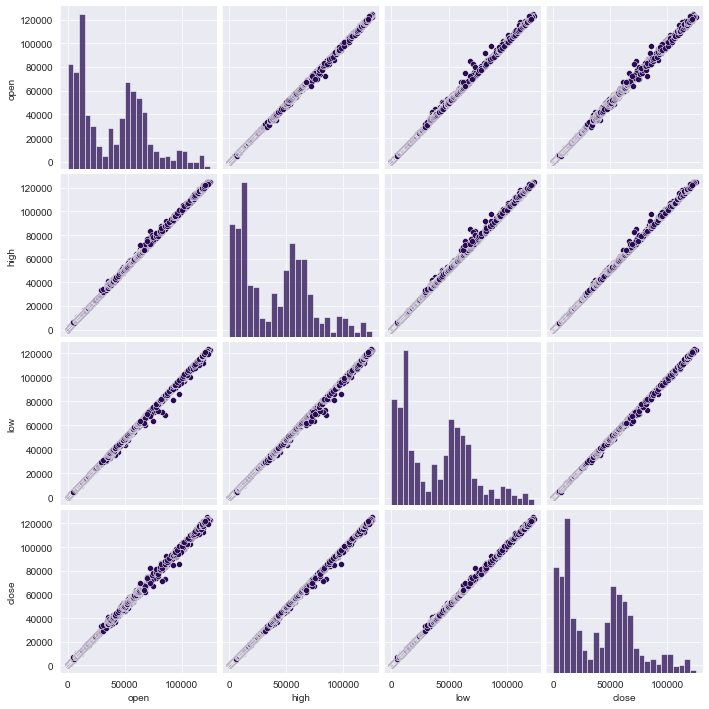

In [22]:
sns.pairplot(bvsp[['open', 'high', 'low', 'close']])

- como era de se esperar as variáveis possuem uma grande relação linear, sendo possível, portanto, prever um valor utilizando-se de outro